# Compare Perform PCA and LDA

# Install and import relevant libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns

# Read and load the data

In [32]:
# Charger le DataFrame initial
df_1 = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')
df_2 = pd.read_csv("../Ressources/Datasets/stand_norm_e2.txt", delimiter='\s+')

# Charger les nouvelles valeurs depuis y2_e1.txt
new_values = pd.read_csv("../Ressources/Datasets/y2_e1.txt", header=None, names=['Class'], delimiter='\s+')

# Concaténer les DataFrames avec les colonnes 'Class' et 'New_Class'
df = pd.concat([new_values, df_1, df_2], axis=1)

df.head(900)

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14
0,0.0,35.533354,220.110174,185.322913,714.120693,3719.146472,0.199611,0.807951,31.626118,345.489585,465.024867,353.379868,679.766033,0.199611,1.172721
1,0.0,12.153222,290.799141,371.267847,825.465771,235.087734,0.233832,0.710784,14.583007,297.938838,238.719070,1180.971365,1441.838840,0.233832,0.871765
2,0.0,15.687117,245.596011,432.266516,969.556869,4529.009906,0.266850,0.607620,14.940141,375.341165,439.139407,1028.171307,2469.411191,0.266850,0.786855
3,0.0,4.130666,266.347021,1400.323393,1503.693799,2897.194341,0.298691,0.572977,31.846588,304.508444,594.597040,1049.210472,1477.424605,0.298691,0.852576
4,0.0,1.666385,72.802457,107.825008,1057.444093,2901.767221,0.329382,0.613656,5.950176,94.237243,73.547132,396.930317,669.509993,0.329382,0.856799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.0,17.208731,148.194510,63.003442,111.243387,2146.133778,0.590211,0.851058,27.640763,474.063547,48.206389,166.360032,460.130158,0.590211,1.134404
896,1.0,4.883533,251.932500,1015.425353,943.971254,1671.002889,0.581489,0.719200,4.322579,367.159016,130.799744,323.640665,994.605693,0.581489,1.198505
897,1.0,5.590907,283.682276,287.911775,1446.697365,3600.282008,0.575397,0.685539,39.685190,441.066522,116.376756,381.380317,650.512390,0.575397,1.149739
898,1.0,9.260278,136.548293,223.010801,577.462713,876.711276,0.568635,0.811406,41.398805,260.769184,160.648854,169.516120,896.395598,0.568635,1.010551


In [33]:
# Function to display correlation matrix
def correlation_matrix(df):
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    cmap = plt.cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Features Correlation Matrix', fontsize=15)
    labels = df.columns
    ax1.set_xticklabels(labels, fontsize=9)
    ax1.set_yticklabels(labels, fontsize=9)
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11, 11)])
    plt.show()

/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3715/2371143171.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', 30)
/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3715/2371143171.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize=9)
/var/folders/2h/mc0j2yvj7m981sq0zs2tp3zh0000gn/T/ipykernel_3715/2371143171.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels, fontsize=9)


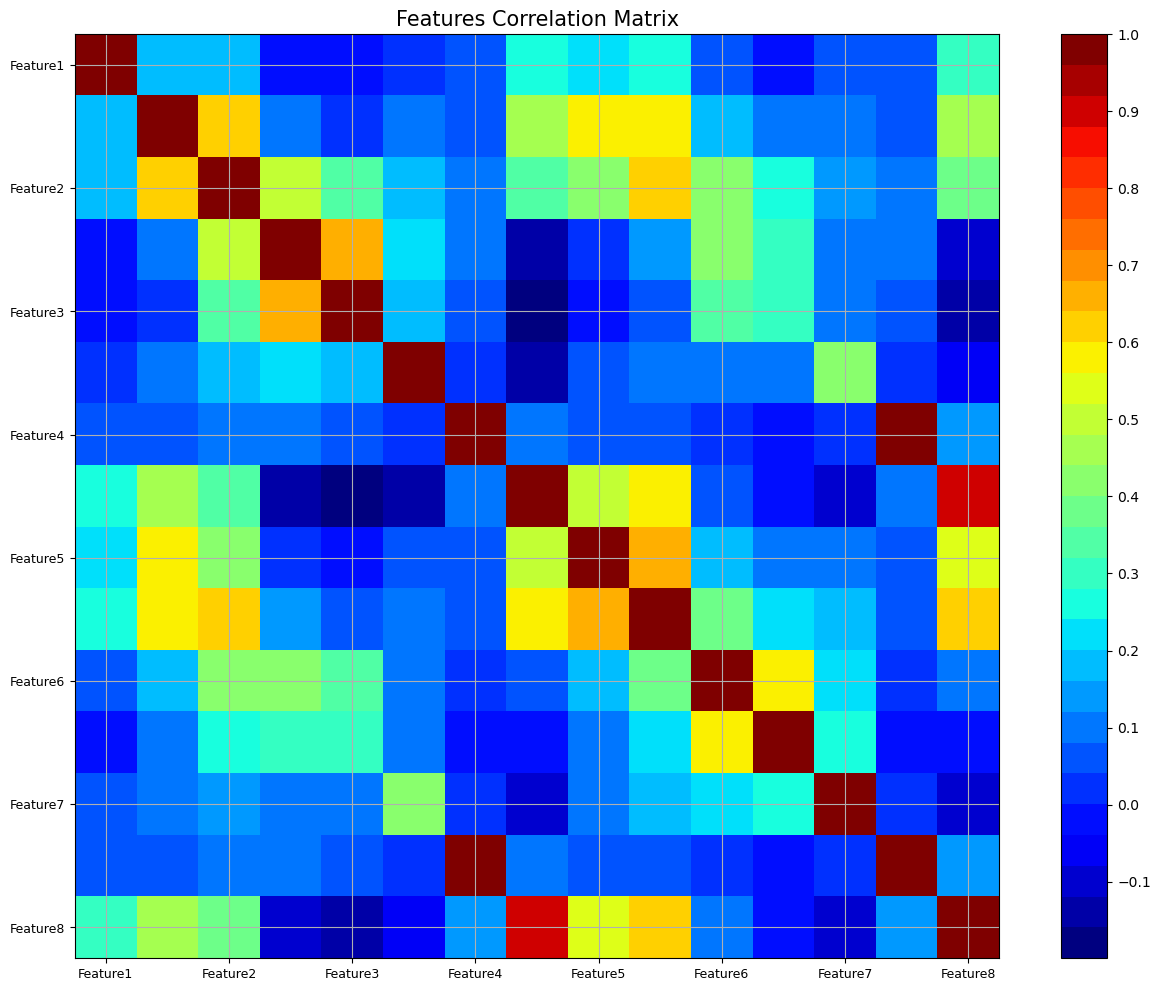

In [34]:
# Display correlation matrix
correlation_matrix(df)

In [35]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# X = df.drop('Class', axis=1) : creates a new DataFrame X containing all the columns of the DataFrame df except for the 'Class' column
# y = df['Class']: This line creates a new Series y containing only the values from the 'Class' column of the DataFrame df.

# Standardize features


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# StandardScaler is a preprocessing technique used to standardize features by removing the mean and scaling to unit variance


# Perform PCA

In [37]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio

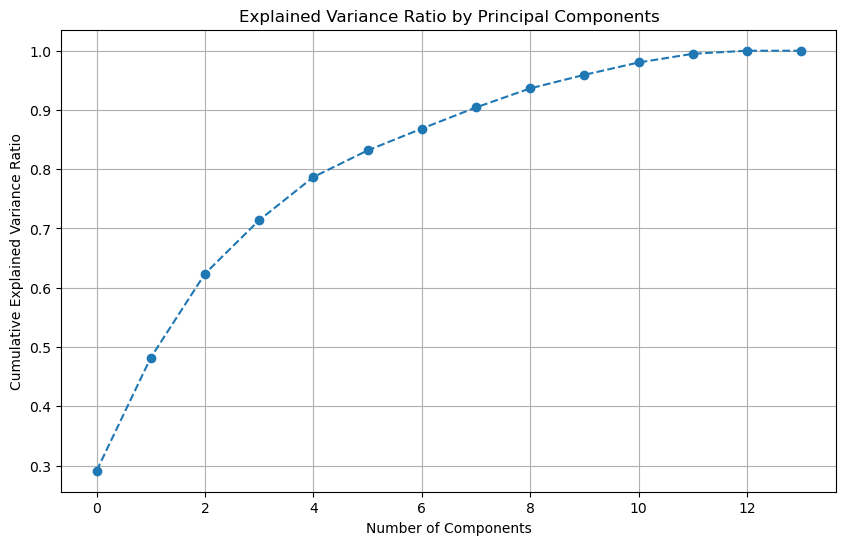

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Perform LDA

In [39]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Split data into training and testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Train and test PCA model

In [41]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train and test LDA model

In [42]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate PCA and LDA performance

In [43]:
pca_score = pca.score(X_test, y_test)
lda_score = lda.score(X_test, y_test)

# Compare performance

In [44]:
if pca_score > lda_score:
    print("PCA outperforms LDA with a score of {:.2f}".format(pca_score*100))
else:
    print("LDA outperforms PCA with a score of {:.2f}".format(lda_score*100))

# lda_score typically refers to the accuracy of the LDA model in correctly predicting the class labels.
# pca_score might represent some form of model fitness or goodness-of-fit measure for the PCA model.

LDA outperforms PCA with a score of 78.06
